In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Create label and data variable
cellphonelabel = ['Name','Camera','Price']
cellphonename = ['H1','H2','H3','H4','H5','H6','H7','H8']
cellphonecamera = [8,2,6,9,4,5,7,3]
cellphoneprice = [7,3,7,None,2,None,8,3]

# Create data dictionary
D = {cellphonelabel[0]:cellphonename, cellphonelabel[1]:cellphonecamera, cellphonelabel[2]:cellphoneprice}

# Import data dictionary to pandas dataframe
df = pd.DataFrame(data=D)

df

,Name,Camera,Price
0,H1,8,7.0
1,H2,2,3.0
2,H3,6,7.0
3,H4,9,NaN
4,H5,4,2.0
5,H6,5,NaN
6,H7,7,8.0
7,H8,3,3.0


In [16]:
# Find Σy
sigmaY = sum(filter(lambda y: isinstance(y,int),cellphoneprice))

# Find (Σx²), Σx and Σxy
sigmaXsquare = 0
sigmaX = 0
sigmaXY = 0
dataLength = 0

for index, val in enumerate(cellphonecamera):
  if isinstance(cellphoneprice[index],int):
    sigmaXsquare += val**2
    sigmaX += val
    sigmaXY += val*cellphoneprice[index]
    dataLength +=1

sumsigmaXsquare = sigmaX**2

dataLength

6

In [18]:
# Find constant a
constantA = ((sigmaY*sigmaXsquare)-(sigmaX*sigmaXY))/((dataLength*sigmaXsquare)-sumsigmaXsquare)
round(constantA,3)

0.179

In [20]:
# Find coefficient b
coeffB = ((dataLength*sigmaXY)-(sigmaX*sigmaY))/((dataLength*sigmaXsquare)-sumsigmaXsquare)
round(coeffB,3)

0.964

In [23]:
# Find missing price H4 and H6
# y = a+bx
for index,val in enumerate(cellphoneprice):
  if not isinstance(val,int):
    cellphoneprice[index] = round(constantA+(coeffB*cellphonecamera[index]),2)

cellphoneprice

[7, 3, 7, 8.86, 2, 5.0, 8, 3]

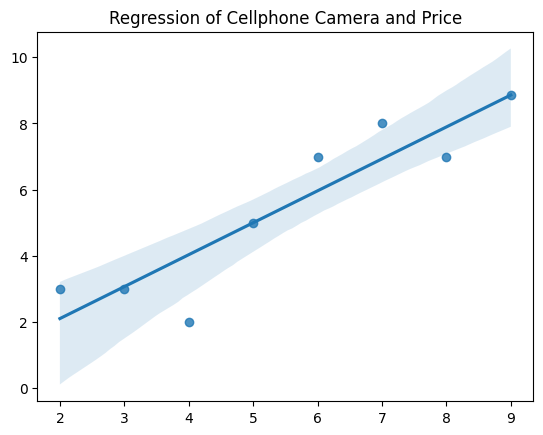

In [25]:
# creater linear graph
sns.regplot(x = cellphonecamera, y = cellphoneprice, data=df)
plt.title('Regression of Cellphone Camera and Price')
plt.show()